In [1]:
from blg_strain.bands import get_bands

In [2]:
Kx, Ky, E, Psi, Omega, Mu = get_bands(Nkx=20, Nky=20)

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

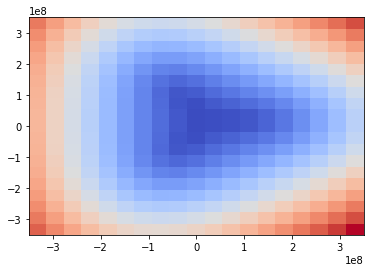

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(Kx, Ky, E[2], cmap='coolwarm')